In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix,roc_curve,auc)
import seaborn as sns
import joblib
import time
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dt_model = DecisionTreeClassifier(max_depth=10)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Model Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Model Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Comparison of Models:")
print(f"Decision Tree Accuracy: {dt_accuracy}, SVM Accuracy: {svm_accuracy}")


Decision Tree Model Accuracy: 0.9444444444444444
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Decision Tree Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
SVM Model Accuracy: 0.9722222222222222
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

SVM Confusion Mat

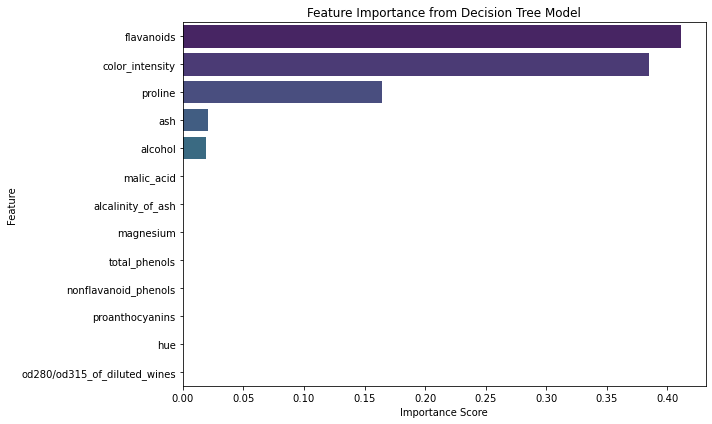

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
feature_names = load_wine().feature_names
importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance',y='Feature',data=feature_importance_df,palette='viridis')
plt.title('Feature Importance from Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
